# Import Packages

In [1]:
from scipy.signal import periodogram
from statsmodels.tsa.stattools import acf, pacf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import itertools
sns.set(style="ticks")
%config IPCompleter.greedy = True
import datetime
from itertools import cycle
from tqdm import tqdm



# self-written packages
import utils 

# Import Data

In [2]:
df_calendar, df_sales, df_prices = utils.import_m5_data()

# Computation on Store and Category Level

In [3]:
# Plot timeseries
store = 'TX_2'
cat = 'HOBBIES'


df = df_sales.loc[df_sales['store_id'] == store].loc[
    df_sales['cat_id'] == cat]
df = utils.transform_dataframe(df, df_calendar, df_prices)
df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
df.reset_index(level=df.index.names, inplace=True)
df


,date,sale
0,2011-01-29,385
1,2011-01-30,359
2,2011-01-31,229
3,2011-02-01,359
4,2011-02-02,257
...,...,...
1908,2016-04-20,373
1909,2016-04-21,340
1910,2016-04-22,388
1911,2016-04-23,436


In [4]:
def forecast_snaive(df_hist, fh=28):
    forecast_sales = []
    forecast_dates = []
    last_date = pd.DatetimeIndex(df_hist['date'].tail(1))
    for i in cycle(reversed(range(1,8))):
        forecast_sales.append(df_hist['sale'].iloc[-i])
        forecast_dates.extend((last_date + pd.DateOffset(weeks=i)).format())
        if len(forecast_sales) == fh:
            break
    return pd.DataFrame({'date': forecast_dates, 'sale': forecast_sales})


In [5]:
fc = forecast_snaive(df, fh=28)

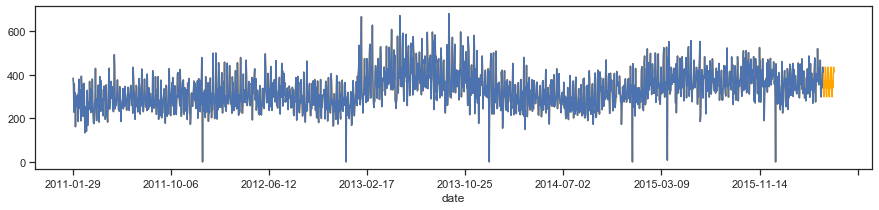

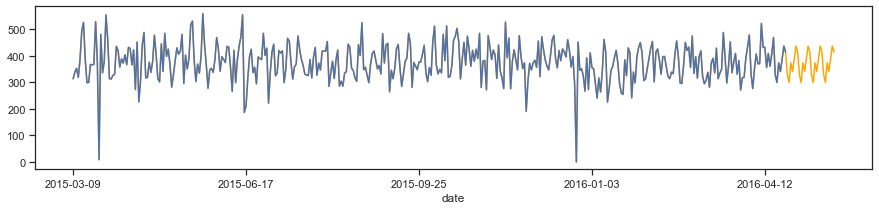

In [6]:
utils.plot_forecasts(df, fc)
utils.plot_forecasts(df.iloc[1500:], fc)

# Computation on Item Level

In [7]:
store = 'TX_2'
cat = 'HOBBIES'


df = df_sales.loc[df_sales['store_id'] == store].loc[
    df_sales['cat_id'] == cat]

df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
15245,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_2,TX,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15246,HOBBIES_1_002_TX_2_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,TX_2,TX,0,0,0,0,...,0,1,0,2,0,1,0,0,0,1
15247,HOBBIES_1_003_TX_2_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,TX_2,TX,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15248,HOBBIES_1_004_TX_2_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_2,TX,1,7,2,1,...,1,0,2,2,2,1,3,0,3,3
15249,HOBBIES_1_005_TX_2_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,TX_2,TX,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15805,HOBBIES_2_145_TX_2_validation,HOBBIES_2_145,HOBBIES_2,HOBBIES,TX_2,TX,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15806,HOBBIES_2_146_TX_2_validation,HOBBIES_2_146,HOBBIES_2,HOBBIES,TX_2,TX,0,0,0,0,...,0,0,0,0,0,0,1,2,0,2
15807,HOBBIES_2_147_TX_2_validation,HOBBIES_2_147,HOBBIES_2,HOBBIES,TX_2,TX,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
15808,HOBBIES_2_148_TX_2_validation,HOBBIES_2_148,HOBBIES_2,HOBBIES,TX_2,TX,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
items = df['id'].iloc[:25]
print(items)


15245    HOBBIES_1_001_TX_2_validation
15246    HOBBIES_1_002_TX_2_validation
15247    HOBBIES_1_003_TX_2_validation
15248    HOBBIES_1_004_TX_2_validation
15249    HOBBIES_1_005_TX_2_validation
15250    HOBBIES_1_006_TX_2_validation
15251    HOBBIES_1_007_TX_2_validation
15252    HOBBIES_1_008_TX_2_validation
15253    HOBBIES_1_009_TX_2_validation
15254    HOBBIES_1_010_TX_2_validation
15255    HOBBIES_1_011_TX_2_validation
15256    HOBBIES_1_012_TX_2_validation
15257    HOBBIES_1_013_TX_2_validation
15258    HOBBIES_1_014_TX_2_validation
15259    HOBBIES_1_015_TX_2_validation
15260    HOBBIES_1_016_TX_2_validation
15261    HOBBIES_1_017_TX_2_validation
15262    HOBBIES_1_018_TX_2_validation
15263    HOBBIES_1_019_TX_2_validation
15264    HOBBIES_1_020_TX_2_validation
15265    HOBBIES_1_021_TX_2_validation
15266    HOBBIES_1_022_TX_2_validation
15267    HOBBIES_1_023_TX_2_validation
15268    HOBBIES_1_024_TX_2_validation
15269    HOBBIES_1_025_TX_2_validation
Name: id, dtype: object


In [9]:
forecasts = {}


progress = tqdm(total=len(items), ncols = 0, position=0, desc='Items') 
    
for item in list(items):
    df_item = df.loc[df['id'] == item]
    df_item = utils.transform_dataframe(df_item, df_calendar, df_prices)
    df_item = pd.pivot_table(df_item, values='sale', index=['date'], aggfunc=np.sum)
    df_item.reset_index(level=df_item.index.names, inplace=True)

    fc_item = forecast_snaive(df_item)
    forecasts[item] = list(fc_item['sale'])

    progress.update()



df_forecasts = pd.DataFrame(forecasts).T


Items: 100% 25/25 [00:42<00:00,  1.70s/it]